In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

In [92]:
Monthly_acc = pd.read_csv('MonthlyAccidents.csv', index_col=[0],parse_dates=[0])


In [93]:
Monthly_acc.head()

,Accidents
Date,
2016-02-01,985
2016-03-01,6329
2016-04-01,18088
2016-05-01,17610
2016-06-01,30527


In [95]:
Monthly_acc.shape

(53, 1)

In [96]:
Monthly_acc.describe()

,Accidents
count,53.000000
mean,66294.660377
std,22297.086497
min,985.000000
25%,55680.000000
50%,71569.000000
75%,79276.000000
max,106817.000000


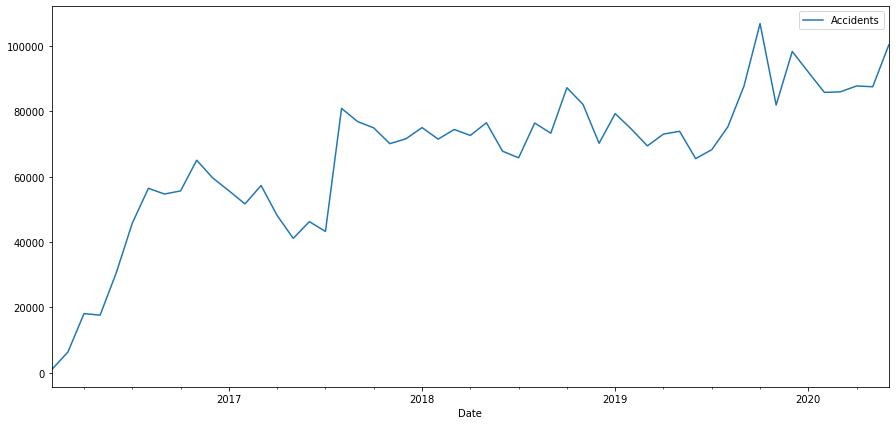

In [97]:
Monthly_acc.plot(figsize=(15,7))
plt.show()

### 1. Baseline Model

In [41]:
#daily_acc_series= daily_acc.values

In [11]:
#value =pd.DataFrame(daily_acc_series)

In [12]:
#d_accDF = pd.concat([value,value.shift(1)],axis=1)

In [42]:
#d_accDF.head(3)

In [14]:
#d_accDF.columns = ('Actual_Accidents','Forecast_Accident')

In [43]:
#d_accDF.head()

In [16]:
#d_accDF.dropna(inplace=True)

In [44]:
# acc_err = mean_squared_error(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident)
# acc_err

In [45]:
#print('RMSE: ', np.sqrt(acc_err))

In [46]:
#print('R-Squared score: ', r2_score(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident))

### 2. ARIMA Model

In [211]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Monthly_acc.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.785536
p-value: 0.060370


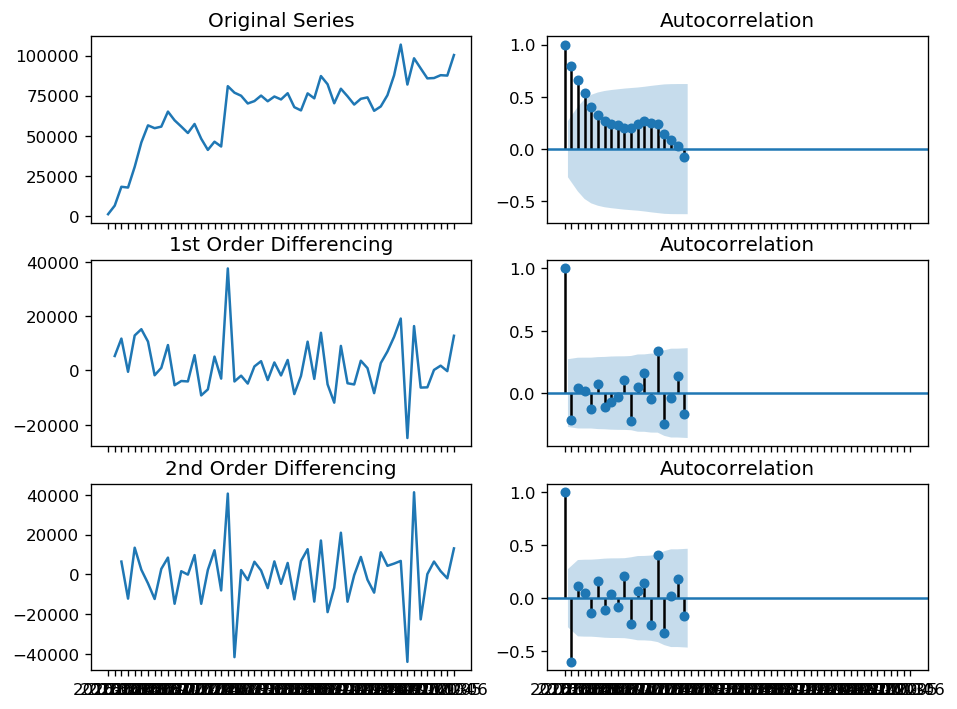

In [212]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('MonthlyAccidents.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [98]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


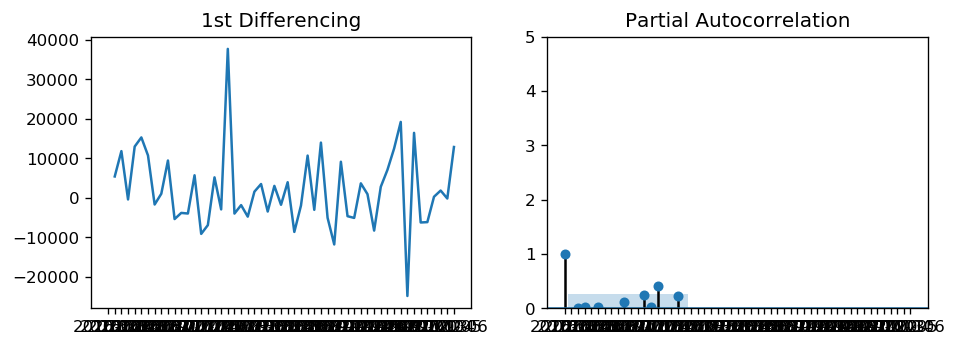

In [213]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

p = 1

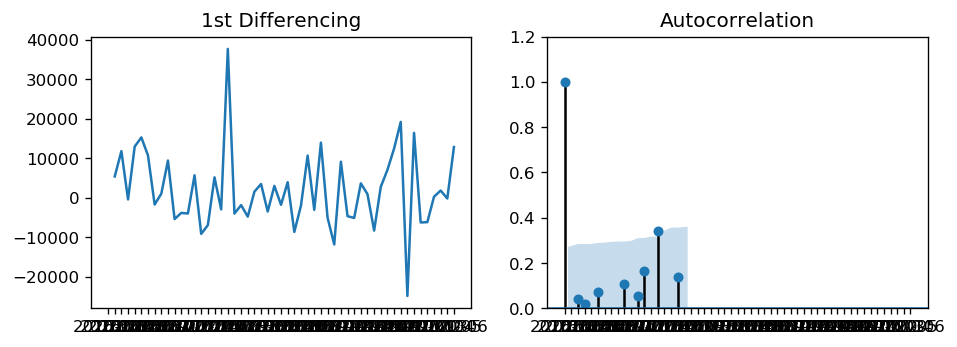

In [214]:
#find q

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

q= 1

In [215]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   52
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -548.838
Method:                       css-mle   S.D. of innovations           9123.293
Date:                Thu, 28 Jan 2021   AIC                           1107.677
Time:                        21:15:59   BIC                           1117.433
Sample:                    03-01-2016   HQIC                          1111.417
                         - 06-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1467.5029    386.458      3.797      0.000     710.059    2224.947
ar.L1.D.value     0.8378      0.135      6.203      0.000       0.573       1.103
ma.L1.D.value    -1.1189      0.176     

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [271]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary())

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -549.082
Method:                       css-mle   S.D. of innovations           9141.860
Date:                Thu, 28 Jan 2021   AIC                           1106.163
Time:                        21:33:36   BIC                           1113.968
Sample:                    03-01-2016   HQIC                          1109.155
                         - 06-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1406.7676    317.007      4.438      0.000     785.445    2028.090
ar.L1.D.value     0.7699      0.113      6.819      0.000       0.549       0.991
ma.L1.D.value    -1.0000      0.066    -

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [217]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,2,1))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   51
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -541.258
Method:                       css-mle   S.D. of innovations           9423.116
Date:                Thu, 28 Jan 2021   AIC                           1090.516
Time:                        21:16:24   BIC                           1098.243
Sample:                    04-01-2016   HQIC                          1093.469
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.4131     72.199     -1.045      0.296    -216.921      66.095
ar.L1.D2.value    -0.2192      0.138     -1.588      0.112      -0.490       0.051
ma.L1.D2.value    -1.0000      0.063

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

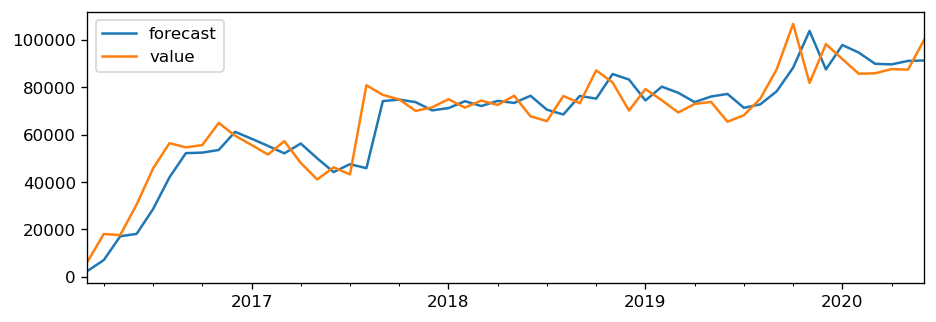

In [183]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

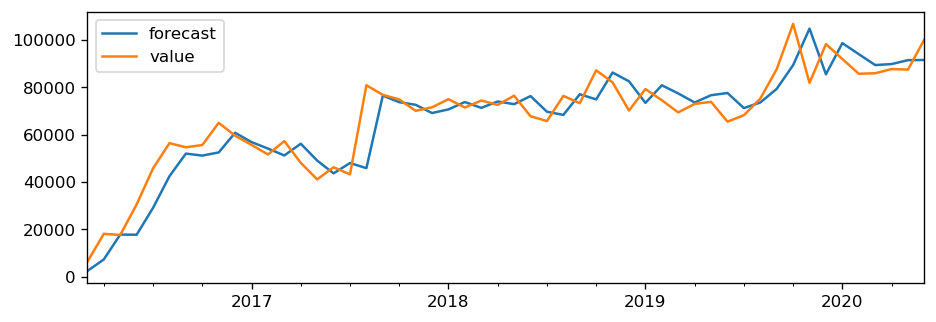

In [272]:
# Actual vs Fitted
model_fit1.plot_predict(dynamic=False)
plt.show()

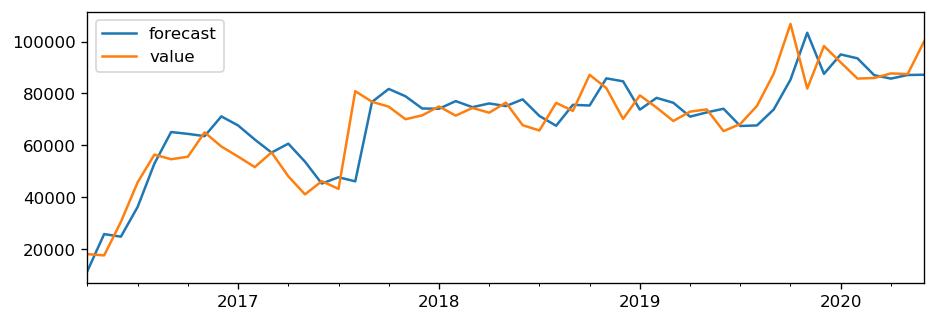

In [185]:
# Actual vs Fitted
model_fit2.plot_predict(dynamic=False)
plt.show()

In [263]:
# Create Training and Test
train = df.value[:39]
test = df.value[39:]

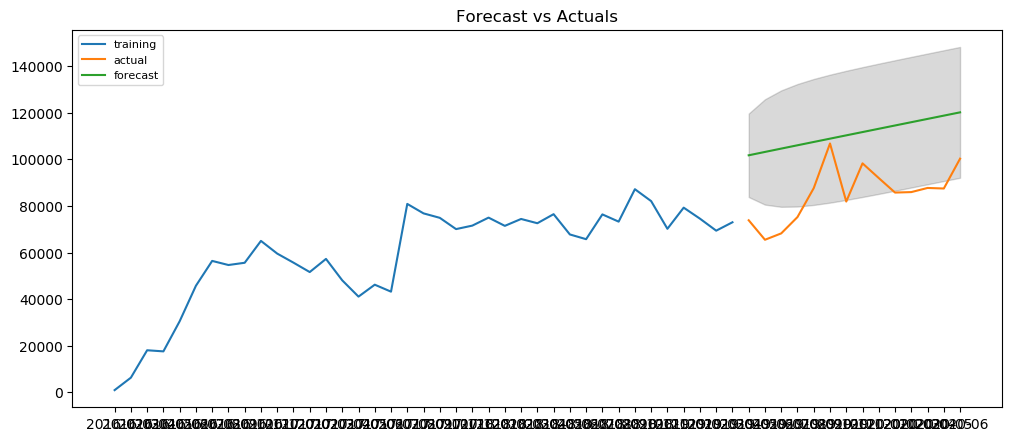

In [273]:
# model = ARIMA(train, order=(1, 1, 1))  
# fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = model_fit1.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [275]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.316566812507798,
 'me': 25510.810011487018,
 'mae': 25510.810011487018,
 'mpe': 0.316566812507798,
 'rmse': 27096.830466575535,
 'corr': 0.617154359017938,
 'minmax': 0.2311837245105164}

In [276]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1133.342, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1334.783, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1304.341, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1135.130, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1135.042, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1301.544, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1137.410, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1145.613, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.534 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -5

In [277]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=857.601, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=867.310, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=861.908, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=855.737, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=865.217, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=857.714, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=857.704, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=860.319, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=859.621, Time=0.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=860.110, Time=0.04 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=856.230, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=858.273, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=857.699, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=857.525, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -424.869
Date:                            Thu, 28 Jan 2021   AIC                            855.737
Time:                                    21:42:47   BIC                            860.804
Sample:                                         0   HQIC                           857.569
                                             - 53                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4688      0.153     -3.073      0.002      -0.768      -0.170
ma.S.L12      -0.6886      0.320     -2.152      0.031      -1.316      -0.061
sigma2      1.226e+08   9.62e-10   1.27e+17      0.000    1.23e+08    1.23e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.96   Prob(JB):                         0.22
Heteroskedasticity (H):               0.98   Skew:                             0.67
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.09e+33. Standard errors may be unstable.
"""

In [279]:
# Actual vs Fitted
smodel.plot_predict(dynamic=True)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_predict'

In [280]:
# model = ARIMA(train, order=(1, 1, 1))  
# fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = smodel.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [222]:
size = int(len(df) * 0.75)
train = df[0:size] 
test = df[size:len(Monthly_acc)]

print(train.size,test.size)

39 14


In [247]:
acc_forecast = model_fit2.forecast(steps=14)[0]

In [248]:
print('RMSE: ',np.sqrt(mean_squared_error(test,acc_forecast)))

RMSE:  15619.651806266816


In [249]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [250]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [251]:
prediction_df= acc_forecast_df
test_df= test

test_prediction= test_df.join(prediction_df)
test_prediction.rename(columns={'value':'Accidents'},inplace=True)
test_prediction.head(10)

,Accidents,Predictions
2019-05,73864,97083.127345
2019-06,65501,97290.156381
2019-07,68234,96655.487806
2019-08,75246,96113.400103
2019-09,87659,95459.069632
2019-10,106817,94737.400267
2019-11,81894,93938.547646
2019-12,98281,93064.669967
2020-01,91969,92115.294086
2020-02,85749,91090.523729


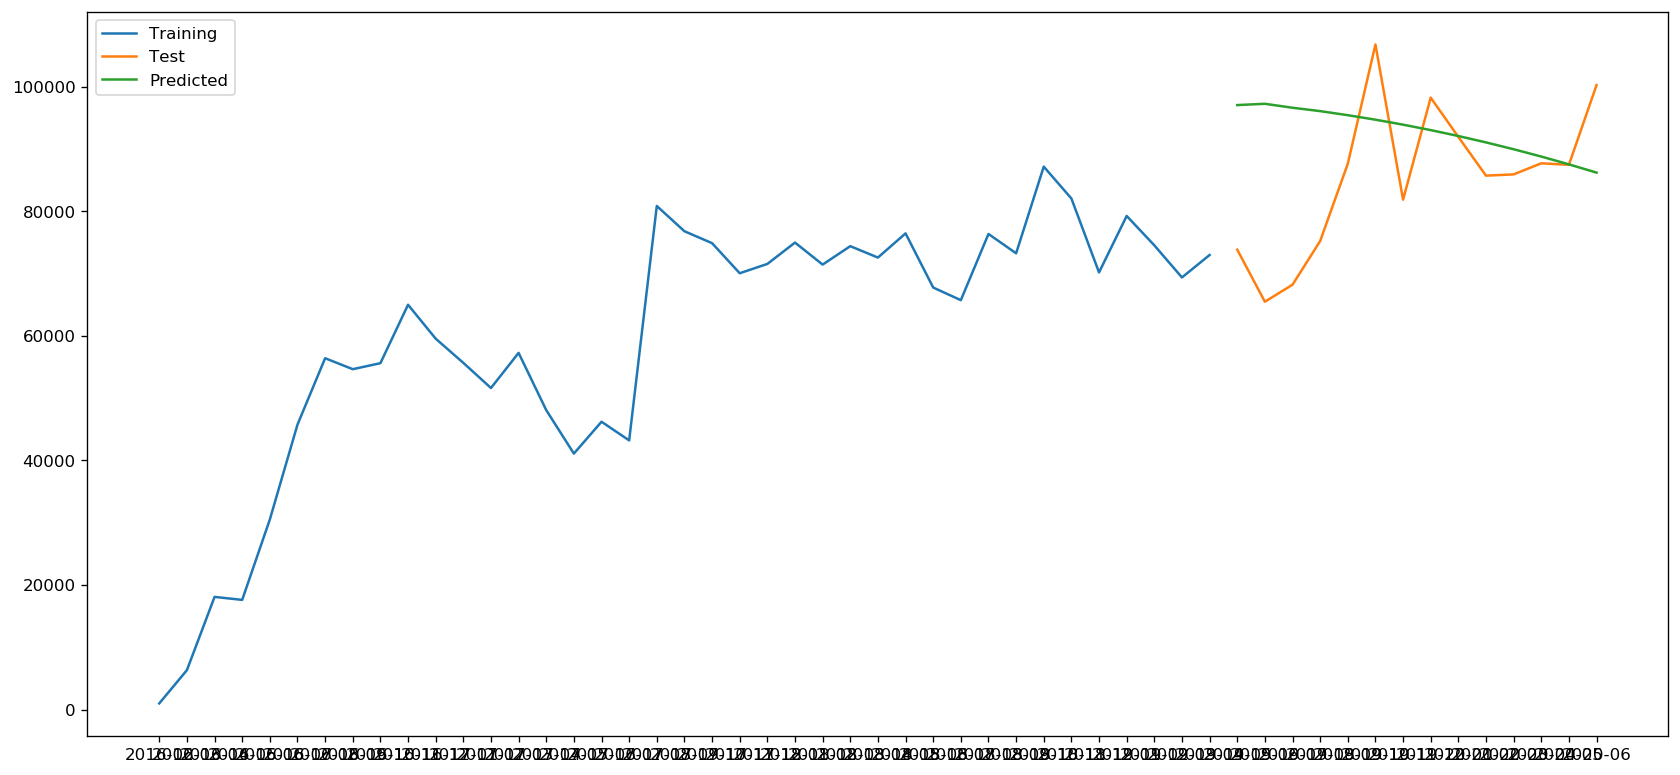

In [252]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(acc_forecast_df,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [254]:
test_series= test_prediction['Accidents'].values.astype('int64')
test_series

array([ 73864,  65501,  68234,  75246,  87659, 106817,  81894,  98281,
        91969,  85749,  85953,  87730,  87490, 100296], dtype=int64)

In [255]:
pred_series= test_prediction['Predictions'].values.astype('int64')
pred_series

array([97083, 97290, 96655, 96113, 95459, 94737, 93938, 93064, 92115,
       91090, 89990, 88814, 87563, 86237], dtype=int64)

In [256]:
from sklearn.metrics import f1_score

In [257]:
f1_score(test_series, pred_series, average='macro')

0.0

In [253]:
print('R-Squared score: ',r2_score(test_prediction['Accidents'],test_prediction['Predictions']))

R-Squared score:  -0.8522821589740714
